#### <b>Importing the Dependencies </b>

In [18]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


<b> Data Loading </b>

In [66]:
w= 0.8
b=0.5

X= torch.arange(start=0, end=5.5, step= 0.05)

#lr 
y = w* X + b

In [67]:
len(X), len(y)

(110, 110)

##### <b> Data Splitting </b>

In [92]:
train_split =  int((0.8) * len(X))
print('Lenght of Training Data', train_split)
#train data splitting
X_train, y_train = X[:train_split], y[:train_split]
X_train = X_train.unsqueeze(1)
y_train = y_train.unsqueeze(1)

print(f'Shape of Training data {X_train.shape}, {y_train.shape}')

#test data
X_test, y_test = X[train_split:], y[train_split:]
X_test = X_test.unsqueeze(1)
y_test = y_test.unsqueeze(1)
print(f'Shape of Testing data {X_test.shape}, {y_test.shape}')

Lenght of Training Data 88
Shape of Training data torch.Size([88, 1]), torch.Size([88, 1])
Shape of Testing data torch.Size([22, 1]), torch.Size([22, 1])


##### <b>Data Visualization</b>

In [147]:
def plot_predictions(
        train_data= X_train, train_labels = y_train,
        test_data = X_test, test_labels = y_test, predictions=None
):
    

    """

    """

    plt.figure(figsize=(12,8))


    plt.scatter(
        train_data, train_labels, c='g', s=5, label='Training Data'
    )
    plt.scatter(
        test_data, test_labels, c='g', s=5, label='Testing Data'
    )
    
    #checking for predictions
    if predictions is not None:
        #plotting the predictions
        plt.scatter(
            test_data, predictions, label='Predictions', c='r'
        )
    
    #displaying the legend
    plt.legend(
        loc='upper left',
        prop={'size':14}
    )


    plt.title('Actual Values vs Predicted Values')

    plt.show()



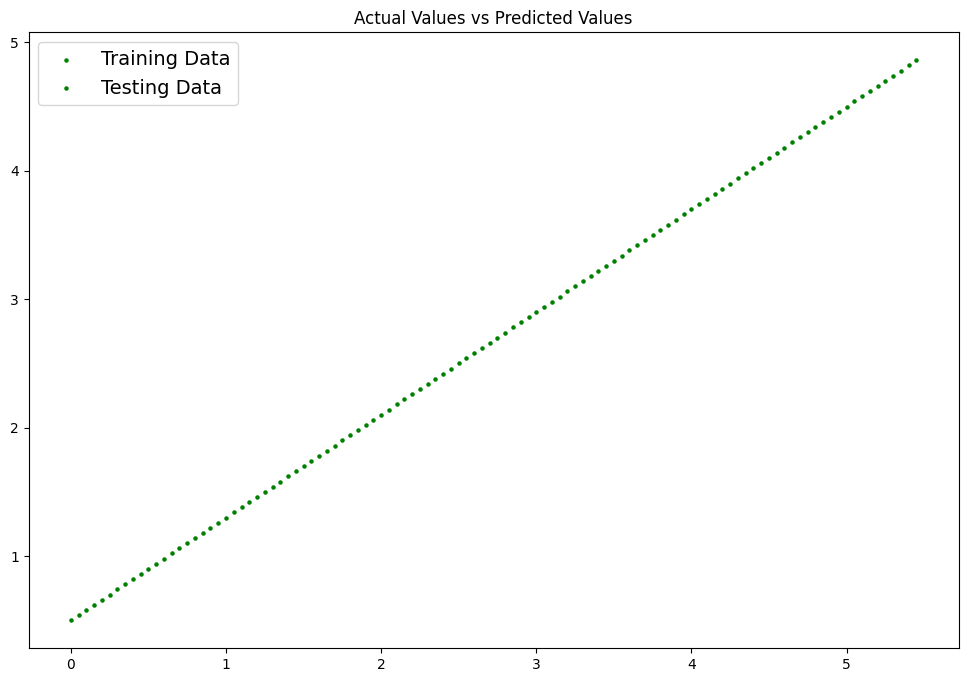

In [148]:
plot_predictions()

#### <b>Building the Neural Network </b>

In [126]:
#creating the linear regression class

class LinearRegressionModel(nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        #using nn.linear also called linear transform , dense layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    
    #Forwrd Propagatin
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

#setting the manual seed
torch.manual_seed(42)

lr_model = LinearRegressionModel()
lr_model, lr_model.state_dict(), list(lr_model.parameters())

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]),
 [Parameter containing:
  tensor([[0.7645]], requires_grad=True),
  Parameter containing:
  tensor([0.8300], requires_grad=True)])

#### <b>Model Evaluation </b>

#### <b> Loss Function & Optimizer </b>

In [127]:
#setting up the loss function
loss_fn = nn.L1Loss()

#setting up the optimizer
optimizer = torch.optim.SGD(lr_model.parameters(), lr=0.01)

In [128]:
torch.manual_seed(42)
epochs = 200

#saving the state
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    lr_model.train()

    #forward pass
    y_pred = lr_model(X_train)

    #calculating the losss
    train_loss= loss_fn(y_pred, y_train)

    #zero grad the optimizer
    optimizer.zero_grad()

    #loss backwards
    train_loss.backward()

    #progress the optimizer
    optimizer.step()

    #Testing
    lr_model.eval()


    with torch.inference_mode():
        #forward pass
        test_pred = lr_model(X_test)

        #calculating the loss
        test_loss = loss_fn(test_pred, y_test)


        #print out after every 10 epochs
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())

            print(f'Epoch: {epoch}\nMAE Train Loss: {train_loss}\nMAE Test Loss: {test_loss}\n')

Epoch: 0
MAE Train Loss: 0.25287914276123047
MAE Test Loss: 0.03824138641357422

Epoch: 10
MAE Train Loss: 0.11426722258329391
MAE Test Loss: 0.1716032475233078

Epoch: 20
MAE Train Loss: 0.09853189438581467
MAE Test Loss: 0.14888620376586914

Epoch: 30
MAE Train Loss: 0.08278397470712662
MAE Test Loss: 0.12616907060146332

Epoch: 40
MAE Train Loss: 0.06705638021230698
MAE Test Loss: 0.09986686706542969

Epoch: 50
MAE Train Loss: 0.051310811191797256
MAE Test Loss: 0.07714982330799103

Epoch: 60
MAE Train Loss: 0.03557288274168968
MAE Test Loss: 0.05084748566150665

Epoch: 70
MAE Train Loss: 0.019840994849801064
MAE Test Loss: 0.03177161514759064

Epoch: 80
MAE Train Loss: 0.030003977939486504
MAE Test Loss: 0.08022388815879822

Epoch: 90
MAE Train Loss: 0.013538569211959839
MAE Test Loss: 0.10400164127349854

Epoch: 100
MAE Train Loss: 0.010010814294219017
MAE Test Loss: 0.10796663910150528

Epoch: 110
MAE Train Loss: 0.00910172425210476
MAE Test Loss: 0.10887562483549118

Epoch: 120


### Making Predictions

In [134]:
lr_model.eval()


with torch.inference_mode():
    y_pred = lr_model(X_test)

y_pred

tensor([[4.0284],
        [4.0684],
        [4.1084],
        [4.1484],
        [4.1883],
        [4.2283],
        [4.2683],
        [4.3083],
        [4.3483],
        [4.3883],
        [4.4283],
        [4.4682],
        [4.5082],
        [4.5482],
        [4.5882],
        [4.6282],
        [4.6682],
        [4.7081],
        [4.7481],
        [4.7881],
        [4.8281],
        [4.8681]])

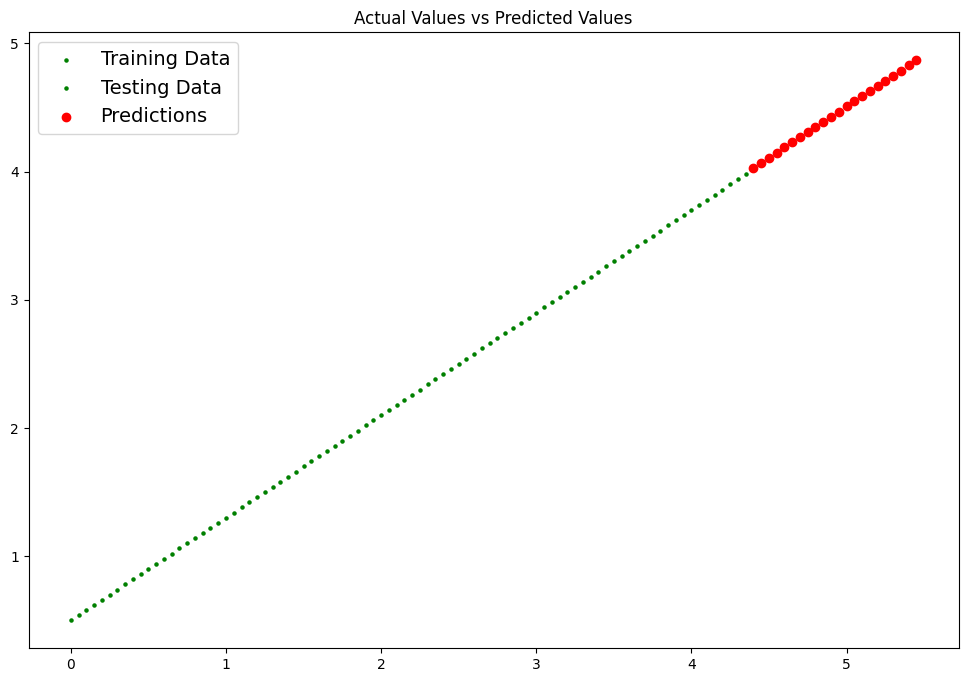

In [149]:
#displaying the lactual values against predicted values
plot_predictions(predictions=y_pred)

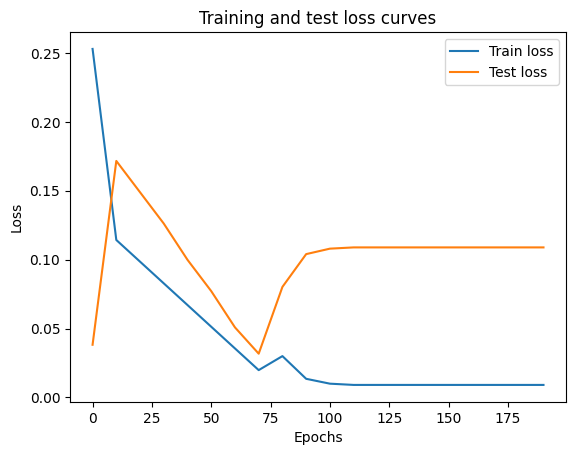

In [150]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [137]:
#saving th model
from pathlib import Path

##### <b> Saving the Model </b>

In [138]:
#1. Creating a model dir
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)


#creatibng the Model Svae path
MODEL_NAME = 'SLR.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#saving model satae dict
print(f'Saving model to : {MODEL_PATH}')
torch.save(obj=lr_model.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : models


##### <b> Loading the Model </b>

In [142]:
#loading the Pytorch model

loaded_model = LinearRegressionModel()

#adding the save dict
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [143]:
loaded_model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [144]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7997]])),
             ('linear_layer.bias', tensor([0.5098]))])

Evaluating the Loaded Model

In [145]:
#evaluation
loaded_model.eval()


with torch.inference_mode():
    load_y_preds = loaded_model(X_test)

load_y_preds

tensor([[4.0284],
        [4.0684],
        [4.1084],
        [4.1484],
        [4.1883],
        [4.2283],
        [4.2683],
        [4.3083],
        [4.3483],
        [4.3883],
        [4.4283],
        [4.4682],
        [4.5082],
        [4.5482],
        [4.5882],
        [4.6282],
        [4.6682],
        [4.7081],
        [4.7481],
        [4.7881],
        [4.8281],
        [4.8681]])

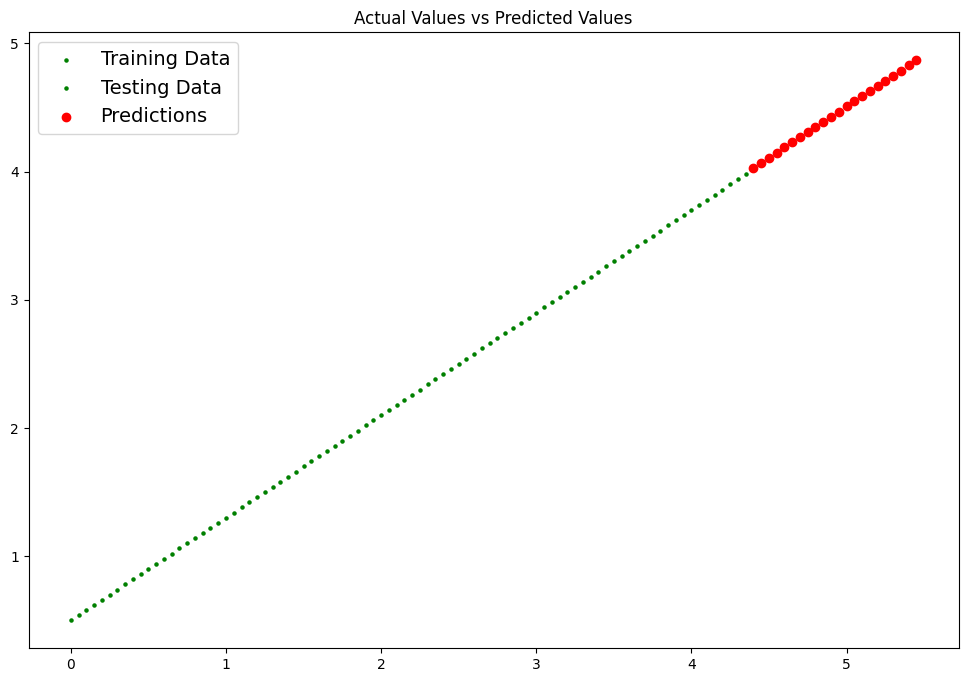

In [151]:
plot_predictions(predictions=load_y_preds)